In [204]:
# Loading Google Drive so we can import csv file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [206]:
# Reading csv file
interestratesdf_path="/content/drive/MyDrive/DMFinalProject/AvgInterestRate_20010131_20231031.csv"
interestratesdf = pd.read_csv(interestratesdf_path)

In [207]:
# Inspection
interestratesdf.head()

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-10-31,Marketable,Treasury Bills,5.44,1,2024,1,2023,4,10,31
1,2023-10-31,Marketable,Treasury Notes,2.19,2,2024,1,2023,4,10,31
2,2023-10-31,Marketable,Treasury Bonds,3.07,3,2024,1,2023,4,10,31
3,2023-10-31,Marketable,Treasury Inflation-Protected Securities (TIPS),0.61,4,2024,1,2023,4,10,31
4,2023-10-31,Marketable,Treasury Floating Rate Notes (FRN),5.43,5,2024,1,2023,4,10,31


In [208]:
# Inspection
interestratesdf.tail()

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
4431,2001-01-31,Non-marketable,United States Savings Securities,6.22,12,2001,2,2001,1,1,31
4432,2001-01-31,Non-marketable,Government Account Series,6.65,13,2001,2,2001,1,1,31
4433,2001-01-31,Non-marketable,Total Non-marketable,6.57,14,2001,2,2001,1,1,31
4434,2001-01-31,Interest-bearing Debt,Total Interest-bearing Debt,6.59,15,2001,2,2001,1,1,31
4435,2001-01-31,Marketable,Treasury Bills,6.06,1,2001,2,2001,1,1,31


In [209]:
# Inspection
# Assessing data types. Object pandas data type is equivalent to string
interestratesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Record Date                   4436 non-null   object 
 1   Security Type Description     4436 non-null   object 
 2   Security Description          4436 non-null   object 
 3   Average Interest Rate Amount  4408 non-null   float64
 4   Source Line Number            4436 non-null   int64  
 5   Fiscal Year                   4436 non-null   int64  
 6   Fiscal Quarter Number         4436 non-null   int64  
 7   Calendar Year                 4436 non-null   int64  
 8   Calendar Quarter Number       4436 non-null   int64  
 9   Calendar Month Number         4436 non-null   int64  
 10  Calendar Day Number           4436 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 381.3+ KB


In [210]:
# All cloumns will be maintained, no duplicates were noted, row count remained unchanged
InterestRates = interestratesdf.drop_duplicates()
InterestRates

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-10-31,Marketable,Treasury Bills,5.44,1,2024,1,2023,4,10,31
1,2023-10-31,Marketable,Treasury Notes,2.19,2,2024,1,2023,4,10,31
2,2023-10-31,Marketable,Treasury Bonds,3.07,3,2024,1,2023,4,10,31
3,2023-10-31,Marketable,Treasury Inflation-Protected Securities (TIPS),0.61,4,2024,1,2023,4,10,31
4,2023-10-31,Marketable,Treasury Floating Rate Notes (FRN),5.43,5,2024,1,2023,4,10,31
...,...,...,...,...,...,...,...,...,...,...,...
4431,2001-01-31,Non-marketable,United States Savings Securities,6.22,12,2001,2,2001,1,1,31
4432,2001-01-31,Non-marketable,Government Account Series,6.65,13,2001,2,2001,1,1,31
4433,2001-01-31,Non-marketable,Total Non-marketable,6.57,14,2001,2,2001,1,1,31
4434,2001-01-31,Interest-bearing Debt,Total Interest-bearing Debt,6.59,15,2001,2,2001,1,1,31


In [211]:
# Assessing for null values
interestratesdf.isnull().any()
interestratesdf.isnull().sum()

Record Date                      0
Security Type Description        0
Security Description             0
Average Interest Rate Amount    28
Source Line Number               0
Fiscal Year                      0
Fiscal Quarter Number            0
Calendar Year                    0
Calendar Quarter Number          0
Calendar Month Number            0
Calendar Day Number              0
dtype: int64

In [212]:
# Displaying only the null values for further inspection
interestratesdf[interestratesdf.isna().any(axis=1)]

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
3506,2005-11-30,Marketable,Treasury Inflation-Indexed Notes,NaN,4,2006,1,2005,4,11,30
3507,2005-11-30,Marketable,Treasury Inflation-Indexed Bonds,NaN,5,2006,1,2005,4,11,30
3523,2005-10-31,Marketable,Treasury Inflation-Indexed Notes,NaN,4,2006,1,2005,4,10,31
3524,2005-10-31,Marketable,Treasury Inflation-Indexed Bonds,NaN,5,2006,1,2005,4,10,31
3540,2005-09-30,Marketable,Treasury Inflation-Indexed Notes,NaN,4,2005,4,2005,3,9,30
3541,2005-09-30,Marketable,Treasury Inflation-Indexed Bonds,NaN,5,2005,4,2005,3,9,30
3557,2005-08-31,Marketable,Treasury Inflation-Indexed Notes,NaN,4,2005,4,2005,3,8,31
3558,2005-08-31,Marketable,Treasury Inflation-Indexed Bonds,NaN,5,2005,4,2005,3,8,31
3574,2005-07-31,Marketable,Treasury Inflation-Indexed Notes,NaN,4,2005,4,2005,3,7,31
3575,2005-07-31,Marketable,Treasury Inflation-Indexed Bonds,NaN,5,2005,4,2005,3,7,31


In [213]:
# Pandas innately knows how to work with NA values, but able to remove or fill if needed
# InterestRates = InterestRates.fillna()
# InterestRates = InterestRates.dropna(subset="Average Interest Rate Amount", inplace=True)
# Used to reset the index if dropping na, drop=True drops the index cloumn and allows reset_index to reset
# InterestRates.reset_index(drop=True)

In [214]:
# Exploratory Data Analysis

In [215]:
# Describing only for Average Interest Rate Amount, as describing other columns were not benefitial
interestratesdf['Average Interest Rate Amount'].describe()

count   4408.00
mean       3.68
std        2.30
min        0.00
25%        2.00
50%        3.24
75%        5.02
max       10.25
Name: Average Interest Rate Amount, dtype: float64

In [216]:
# Sorting top ten average interest rate amount in descending order
interestratesdf.sort_values(by='Average Interest Rate Amount', ascending=False).head(10)

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
233,2022-09-30,Non-marketable,United States Savings Inflation Securities,10.25,13,2022,4,2022,3,9,30
199,2022-11-30,Non-marketable,United States Savings Inflation Securities,10.15,13,2023,1,2022,4,11,30
250,2022-08-31,Non-marketable,United States Savings Inflation Securities,10.03,13,2022,4,2022,3,8,31
267,2022-07-31,Non-marketable,United States Savings Inflation Securities,9.77,13,2022,4,2022,3,7,31
182,2022-12-31,Non-marketable,United States Savings Inflation Securities,9.62,13,2023,1,2022,4,12,31
284,2022-06-30,Non-marketable,United States Savings Inflation Securities,9.31,13,2022,3,2022,2,6,30
165,2023-01-31,Non-marketable,United States Savings Inflation Securities,8.96,13,2023,2,2023,1,1,31
4187,2002-04-30,Marketable,Federal Financing Bank,8.92,6,2002,3,2002,2,4,30
4299,2001-09-30,Marketable,Federal Financing Bank,8.92,6,2001,4,2001,3,9,30
4251,2001-12-31,Marketable,Federal Financing Bank,8.92,6,2002,1,2001,4,12,31


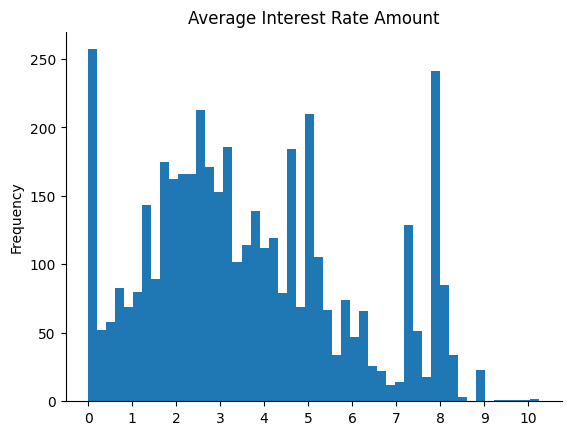

In [217]:
# Set custom labels and ticks on the x-axis
plt.xticks(range(0, 11, 1))

# Frequency of interest rate
interestratesdf['Average Interest Rate Amount'].plot(kind='hist', bins=50, title='Average Interest Rate Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)


In [218]:
#'InterestRates' DataFrame and 'Security Type Description' is the column for grouping
grouped_data_std = interestratesdf.groupby('Security Type Description')

# Calculate mean, sum, etc for 'Average Interest Rate Amount' for each category
grouped_data_std_result = grouped_data_std['Average Interest Rate Amount'].agg(['mean', 'std', 'min', 'max', 'sum'])

# Visualize results
grouped_data_std_result


,mean,std,min,max,sum
Security Type Description,,,,,
Interest-bearing Debt,3.36,1.31,1.56,6.59,919.51
Marketable,3.07,2.06,0.04,8.92,5475.55
Non-marketable,4.18,2.43,0.00,10.25,9832.53


In [219]:
#'InterestRates' DataFrame and 'Security Type Description' is the column for grouping
grouped_data_fiscal_year = interestratesdf.groupby('Fiscal Year')

# Calculate mean, sum, etc for 'Average Interest Rate Amount' for each category
grouped_data_fiscal_year_result = grouped_data_fiscal_year['Average Interest Rate Amount'].agg(['mean', 'std', 'min', 'max', 'sum'])

# Visualize results
grouped_data_fiscal_year_result


,mean,std,min,max,sum
Fiscal Year,,,,,
2001,6.06,1.57,3.34,8.92,860.24
2002,5.55,1.82,1.75,8.92,1066.05
2003,4.97,1.81,1.01,8.27,914.49
2004,4.69,1.92,0.98,8.21,843.78
2005,4.87,1.82,1.71,8.08,861.71
2006,5.03,1.68,1.81,8.06,905.39
2007,5.14,1.66,1.82,8.06,925.12
2008,4.77,1.73,1.60,8.06,868.55
2009,3.86,2.07,0.00,7.94,736.97


In [220]:
# 'air_by_year' is the DataFrame with aggregated data
total_fiscal_years = grouped_data_fiscal_year_result.shape[0]

# Print the total number of Fiscal Years
print("Total Fiscal Years:", total_fiscal_years)


Total Fiscal Years: 24


In [221]:
# Reading  historical data csv file
historicaldebtdf_path ="/content/drive/MyDrive/DMFinalProject/HstDebt_20010101_20230930.csv"
historicaldebtdf = pd.read_csv(historicaldebtdf_path)

In [222]:
# Inspection
historicaldebtdf.head()

,Record Date,Debt Outstanding Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-09-30,33167334044723.16,1,2023,4,2023,3,9,30
1,2022-09-30,30928911613306.73,1,2022,4,2022,3,9,30
2,2021-09-30,28428918570048.68,1,2021,4,2021,3,9,30
3,2020-09-30,26945391194615.15,1,2020,4,2020,3,9,30
4,2019-09-30,22719401753433.78,1,2019,4,2019,3,9,30


In [223]:
# Inspection
historicaldebtdf.head()

,Record Date,Debt Outstanding Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-09-30,33167334044723.16,1,2023,4,2023,3,9,30
1,2022-09-30,30928911613306.73,1,2022,4,2022,3,9,30
2,2021-09-30,28428918570048.68,1,2021,4,2021,3,9,30
3,2020-09-30,26945391194615.15,1,2020,4,2020,3,9,30
4,2019-09-30,22719401753433.78,1,2019,4,2019,3,9,30


In [224]:
# Inspection
# Assessing data types. Object pandas data type is equivalent to string
historicaldebtdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Record Date              23 non-null     object 
 1   Debt Outstanding Amount  23 non-null     float64
 2   Source Line Number       23 non-null     int64  
 3   Fiscal Year              23 non-null     int64  
 4   Fiscal Quarter Number    23 non-null     int64  
 5   Calendar Year            23 non-null     int64  
 6   Calendar Quarter Number  23 non-null     int64  
 7   Calendar Month Number    23 non-null     int64  
 8   Calendar Day Number      23 non-null     int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.7+ KB


In [225]:
# Assessing for null values
historicaldebtdf.isnull().any()
historicaldebtdf.isnull().sum()

Record Date                0
Debt Outstanding Amount    0
Source Line Number         0
Fiscal Year                0
Fiscal Quarter Number      0
Calendar Year              0
Calendar Quarter Number    0
Calendar Month Number      0
Calendar Day Number        0
dtype: int64

In [226]:
# Assuming 'grouped_data_fiscal_year_result' is the grouped DataFrame
# and 'historicaldebtdf' is the DataFrame with the 'Debt Outstanding Amount' column

# Merge based on the 'Fiscal Year' column
merged_df = pd.merge(grouped_data_fiscal_year_result, historicaldebtdf[['Fiscal Year', 'Debt Outstanding Amount']],
                     left_on='Fiscal Year', right_on='Fiscal Year', how='left')

# Display the merged DataFrame
merged_df



,Fiscal Year,mean,std,min,max,sum,Debt Outstanding Amount
0,2001,6.06,1.57,3.34,8.92,860.24,5807463412200.06
1,2002,5.55,1.82,1.75,8.92,1066.05,6228235965597.16
2,2003,4.97,1.81,1.01,8.27,914.49,6783231062743.62
3,2004,4.69,1.92,0.98,8.21,843.78,7379052696330.32
4,2005,4.87,1.82,1.71,8.08,861.71,7932709661723.50
5,2006,5.03,1.68,1.81,8.06,905.39,8506973899215.23
6,2007,5.14,1.66,1.82,8.06,925.12,9007653372262.48
7,2008,4.77,1.73,1.60,8.06,868.55,10024724896912.49
8,2009,3.86,2.07,0.00,7.94,736.97,11909829003511.75
9,2010,3.57,2.00,0.00,7.94,684.65,13561623030891.79


In [228]:
# Inspection
# Assessing data types.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fiscal Year              24 non-null     int64  
 1   mean                     24 non-null     float64
 2   std                      24 non-null     float64
 3   min                      24 non-null     float64
 4   max                      24 non-null     float64
 5   sum                      24 non-null     float64
 6   Debt Outstanding Amount  23 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.5 KB
